In [1]:
# Packages
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import ipympl
from mpl_toolkits.mplot3d import Axes3D
import squarify
import category_encoders as ce
import networkx as nx
# Force widgets to be shown on notebook (may need permissions from the user)
%matplotlib widget
#%matplotlib inline

In [2]:
subPlots_Title_fontSize = 12
subPlots_xAxis_fontSize = 10
subPlots_yAxis_fontSize = 10
subPlots_label_fontSize = 10
heatmaps_text_fontSize = 8

plots_Title_fontSize = 14
plots_Title_textColour = 'black'

plots_Legend_fontSize = 12
plots_Legend_textColour = 'black'

In [3]:
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

In [4]:
data = pd.read_excel(r'C:\Users\user\Exports\MergedData.xlsx', sheet_name='Reviews')
data 

,Local ID,Extraction Date,Global Rating,Position On Ranking,Sites On Ranking,Total Reviews,User Name,User Location,User Contributions,Trip Type,Review Written,Review Visited,Review Rating,Review Language,Review Full Text,User ISO,ISO
0,MAG001,2021-08-20 08:24:40.077,4.5,1,1186,163828,Maurice M@MauriceM171,"Indianapolis, IN",29,Couples,2021-08-18,2021-08-01,5,en,"Absolutely breathtaking use of light, an amazi...",US,ES
1,MAG001,2021-08-20 08:24:40.097,4.5,1,1186,163828,nickchamb@nickchamb,"Bandon, Ireland",7,Couples,2021-08-17,2021-03-01,5,en,A really interesting and beautiful place to vi...,IE,ES
2,MAG001,2021-08-20 08:24:40.117,4.5,1,1186,163828,Arthur Villon@arthur4588,"Valencia, Spain",268,Friends,2021-08-16,2021-08-01,5,en,Beautiful place and must visit place in barcel...,ES,ES
3,MAG001,2021-08-20 08:24:40.147,4.5,1,1186,163828,James U@696jamesu,NaN,7,NaN,2021-08-16,2021-07-01,5,en,A MUST when visiting Barcelkona. It is consta...,NaN,ES
4,MAG001,2021-08-20 08:24:40.168,4.5,1,1186,163828,paul n@pauln3630,"Towaco, NJ",21,NaN,2021-08-15,2021-08-01,3,en,The sheer height of this church makes it a onc...,US,ES
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67732,MAG100,2021-08-21 16:27:11.518,4.5,11,677,5179,Diego B@diegobX5676JH,"Buenos Aires, Argentina",86,Couples,2019-04-23,2019-04-01,5,en,Florence is my favorite Italian city so far.Th...,AR,IT
67733,MAG100,2021-08-21 16:27:11.614,4.5,11,677,5179,rosa.ji@rosaji,NaN,14,Friends,2019-04-23,2019-03-01,5,en,"I don't even want to review this city, because...",NaN,IT
67734,MAG100,2021-08-21 16:27:11.705,4.5,11,677,5179,Margrieta K@Margrieta2013,"Elburg, The Netherlands",403,Business,2019-03-24,2019-03-01,5,en,The old centre of Florence is realy worth the ...,NL,IT
67735,MAG100,2021-08-21 16:27:12.086,4.5,11,677,5179,KateJourney@KateJourney,"Exeter, Canada",185,NaN,2019-02-12,2018-11-01,4,en,It is an ironic twist to see all of the modern...,CA,IT


We will make a series of comparisons based on the attractions and their respective locations, as well as the users' places of origin.

### The Most Visited Places

In [5]:
# Group by 'Country' and count the number of reviews for each country
most_visited_countries = data['ISO'].value_counts().reset_index()

In [6]:
# Rename the columns to make them clearer
most_visited_countries.columns = ['Country', 'Number_of_Reviews']

In [7]:
# Display the result
most_visited_countries.head(10)

,Country,Number_of_Reviews
0,UK,18998
1,ES,17254
2,IT,4805
3,PT,4166
4,PL,3413
5,AT,2851
6,FR,2755
7,RU,2461
8,GR,2288
9,HR,1915


In the section above we have the countries that have received the highest number of user reviews. This can give a general idea of who the main competitors of Portugal are in terms of popularity: United Kingdom, Spain, and Italy.

E:\user\anaconda3\Lib\site-packages\ipywidgets\widgets\widget.py:528: DeprecationWarning: The `ipykernel.comm.Comm` class has been deprecated. Please use the `comm` module instead.For creating comms, use the function `from comm import create_comm`.
  self.comm = Comm(**args)
E:\user\anaconda3\Lib\site-packages\ipywidgets\widgets\widget.py:528: DeprecationWarning: The `ipykernel.comm.Comm` class has been deprecated. Please use the `comm` module instead.For creating comms, use the function `from comm import create_comm`.
  self.comm = Comm(**args)
E:\user\anaconda3\Lib\site-packages\ipywidgets\widgets\widget.py:502: DeprecationWarning: Passing unrecognized arguments to super(Toolbar).__init__().
NavigationToolbar2WebAgg.__init__() missing 1 required positional argument: 'canvas'
This is deprecated in traitlets 4.2.This error will be raised in a future release of traitlets.
  super().__init__(**kwargs)
E:\user\anaconda3\Lib\site-packages\ipywidgets\widgets\widget.py:528: DeprecationWarnin

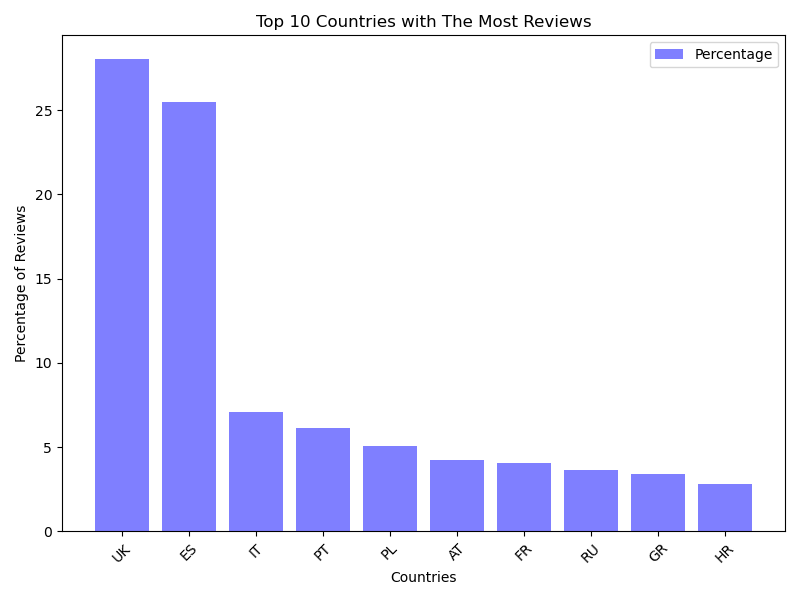

In [11]:
# Calculate total reviews
total_reviews = most_visited_countries['Number_of_Reviews'].sum()

# Calculate percentages and add to DataFrame
most_visited_countries['Percentage'] = (most_visited_countries['Number_of_Reviews'] / total_reviews) * 100

# Select the top 10 countries
top_countries = most_visited_countries.head(10)

# Creating a Bar Chart
plt.figure(figsize=(8, 6))
plt.bar(top_countries['Country'], top_countries['Percentage'], color='blue', alpha=0.5, label='Percentage')
plt.xlabel('Countries')
plt.ylabel('Percentage of Reviews')
plt.title('Top 10 Countries with The Most Reviews')
plt.xticks(rotation=45)
plt.legend()

# Show the chart
plt.tight_layout()
plt.show()

### Identify the most popular and highest rated countries in the dataset.

In [16]:
# Group by 'Country' and calculate the required metrics
country_ratings_stats = data.groupby('ISO')['Review Rating'].agg(['size', 'mean']).reset_index()

In [17]:
# Rename the columns to match the desired names ('reviewRating-size' and 'reviewRating-mean')
country_ratings_stats.columns = ['ISO', 'reviewRating-size', 'reviewRating-mean']

In [18]:
# Sort the DataFrame by 'reviewRating-size' and 'reviewRating-mean' in descending order
sorted_results = country_ratings_stats.sort_values(by=['reviewRating-size', 'reviewRating-mean'], ascending=False)

In [19]:
sorted_results.head(25)

,ISO,reviewRating-size,reviewRating-mean
22,UK,18998,4.509580
7,ES,17254,4.601831
13,IT,4805,4.638502
19,PT,4166,4.427988
18,PL,3413,4.596836
0,AT,2851,4.557348
9,FR,2755,4.458439
20,RU,2461,4.704592
10,GR,2288,4.693619
11,HR,1915,4.603655


E:\user\anaconda3\Lib\site-packages\ipywidgets\widgets\widget.py:528: DeprecationWarning: The `ipykernel.comm.Comm` class has been deprecated. Please use the `comm` module instead.For creating comms, use the function `from comm import create_comm`.
  self.comm = Comm(**args)
E:\user\anaconda3\Lib\site-packages\ipywidgets\widgets\widget.py:528: DeprecationWarning: The `ipykernel.comm.Comm` class has been deprecated. Please use the `comm` module instead.For creating comms, use the function `from comm import create_comm`.
  self.comm = Comm(**args)
E:\user\anaconda3\Lib\site-packages\ipywidgets\widgets\widget.py:502: DeprecationWarning: Passing unrecognized arguments to super(Toolbar).__init__().
NavigationToolbar2WebAgg.__init__() missing 1 required positional argument: 'canvas'
This is deprecated in traitlets 4.2.This error will be raised in a future release of traitlets.
  super().__init__(**kwargs)
E:\user\anaconda3\Lib\site-packages\ipywidgets\widgets\widget.py:528: DeprecationWarnin

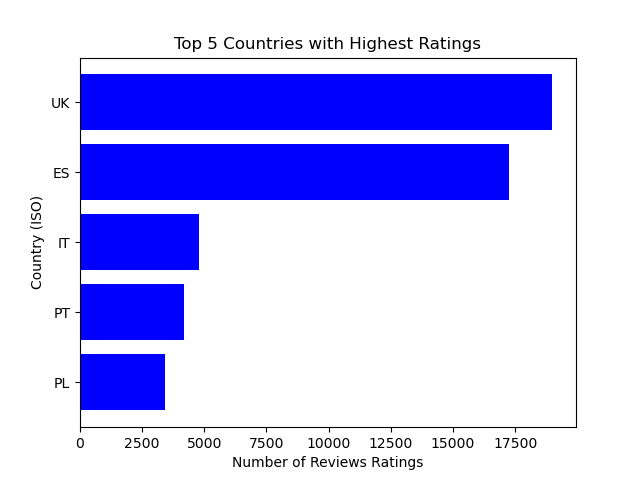

In [20]:
# Selection of the top five countries with the best ratings
top_countries = sorted_results.head(5)

# Creation of figure and axis
fig, ax = plt.subplots()

# Creation of horizontal bar graphs
ax.barh(top_countries['ISO'], top_countries['reviewRating-size'], color='blue')

# Set the labels for the X and Y axes
ax.set_xlabel('Number of Reviews Ratings')
ax.set_ylabel('Country (ISO)')

# Chart title setting
ax.set_title('Top 5 Countries with Highest Ratings')

# Reverse the order of the y-axis to display the country with the highest rating at the top.
ax.invert_yaxis()

# Display graph
plt.show()

### Where do visitors to Portugal come from?

Overall, this code allows you to identify the countries of origin of visitors who left reviews related to Portugal and how many visitors came from each country. Marketing campaigns can be organized accordingly.

In [19]:
# Filter reviews related to Portugal
portugal_reviews = data[data['ISO'] == 'PT']

In [21]:
# Group by 'User Location' and count the number of reviews for each country
visitors_to_portugal = portugal_reviews['User ISO'].value_counts().reset_index()

In [22]:
# Rename the columns to make them clearer
visitors_to_portugal.columns = ['Country', 'Number_of_Visitors']

In [23]:
# Display the result
visitors_to_portugal.head(20)  # Displaying the top countries, you can remove .head() to see all countries

,Country,Number_of_Visitors
0,US,1015
1,UK,880
2,CA,278
3,PT,180
4,AU,157
5,IE,86
6,NL,71
7,ES,52
8,DE,51
9,IT,50


E:\user\anaconda3\Lib\site-packages\ipywidgets\widgets\widget.py:528: DeprecationWarning: The `ipykernel.comm.Comm` class has been deprecated. Please use the `comm` module instead.For creating comms, use the function `from comm import create_comm`.
  self.comm = Comm(**args)
E:\user\anaconda3\Lib\site-packages\ipywidgets\widgets\widget.py:528: DeprecationWarning: The `ipykernel.comm.Comm` class has been deprecated. Please use the `comm` module instead.For creating comms, use the function `from comm import create_comm`.
  self.comm = Comm(**args)
E:\user\anaconda3\Lib\site-packages\ipywidgets\widgets\widget.py:502: DeprecationWarning: Passing unrecognized arguments to super(Toolbar).__init__().
NavigationToolbar2WebAgg.__init__() missing 1 required positional argument: 'canvas'
This is deprecated in traitlets 4.2.This error will be raised in a future release of traitlets.
  super().__init__(**kwargs)
E:\user\anaconda3\Lib\site-packages\ipywidgets\widgets\widget.py:528: DeprecationWarnin

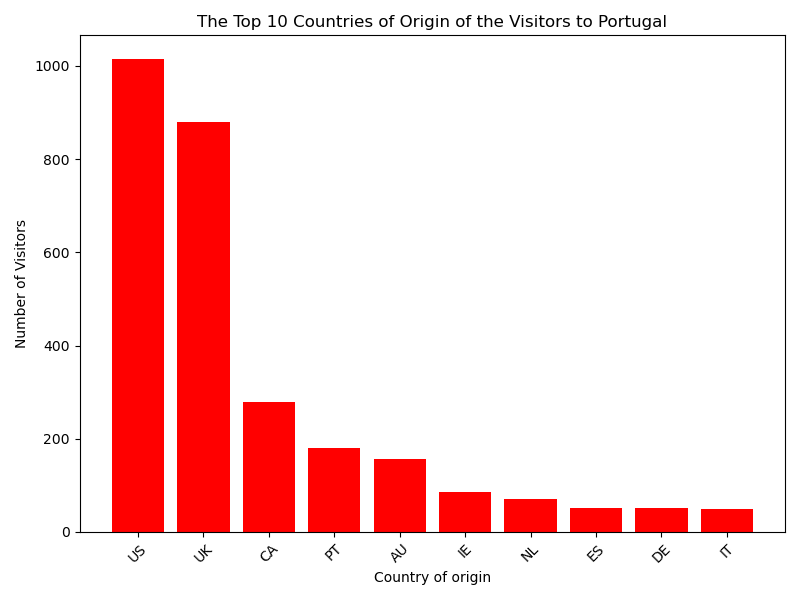

In [28]:
# Top 10 countries filter and selection
top_10_countries = visitors_to_portugal.head(10)

# Create a figure and axis
plt.figure(figsize=(8, 6))
plt.bar(top_10_countries['Country'], top_10_countries['Number_of_Visitors'], color='red')

# Set chart labels and title
plt.xlabel('Country of origin')
plt.ylabel('Number of Visitors')
plt.title('The Top 10 Countries of Origin of the Visitors to Portugal')

# Rotate X-Axis labels to make reading easier
plt.xticks(rotation=45)

# Display graph
plt.tight_layout()
plt.show()

We will start a survey on the origin of visitors to Portugal's main competitors. This will allow us to make comparisons between countries.

### Where do visitors to Spain come from?

In [29]:
# Filter reviews related to Spain
Spain_reviews = data[data['ISO'] == 'ES']

In [30]:
# Group by 'User Location' and count the number of reviews for each country
visitors_to_Spain = Spain_reviews['User ISO'].value_counts().reset_index()

In [32]:
# Rename the columns to make them clearer
visitors_to_Spain.columns = ['Country', 'Number_of_Visitors']

In [33]:
# Display the result
visitors_to_Spain.head(20)  # Displaying the top countries, you can remove .head() to see all countries

,Country,Number_of_Visitors
0,US,4840
1,UK,4209
2,AU,771
3,CA,712
4,ES,569
5,IN,179
6,IE,167
7,FR,147
8,NL,145
9,IT,134


E:\user\anaconda3\Lib\site-packages\ipywidgets\widgets\widget.py:528: DeprecationWarning: The `ipykernel.comm.Comm` class has been deprecated. Please use the `comm` module instead.For creating comms, use the function `from comm import create_comm`.
  self.comm = Comm(**args)
E:\user\anaconda3\Lib\site-packages\ipywidgets\widgets\widget.py:528: DeprecationWarning: The `ipykernel.comm.Comm` class has been deprecated. Please use the `comm` module instead.For creating comms, use the function `from comm import create_comm`.
  self.comm = Comm(**args)
E:\user\anaconda3\Lib\site-packages\ipywidgets\widgets\widget.py:502: DeprecationWarning: Passing unrecognized arguments to super(Toolbar).__init__().
NavigationToolbar2WebAgg.__init__() missing 1 required positional argument: 'canvas'
This is deprecated in traitlets 4.2.This error will be raised in a future release of traitlets.
  super().__init__(**kwargs)
E:\user\anaconda3\Lib\site-packages\ipywidgets\widgets\widget.py:528: DeprecationWarnin

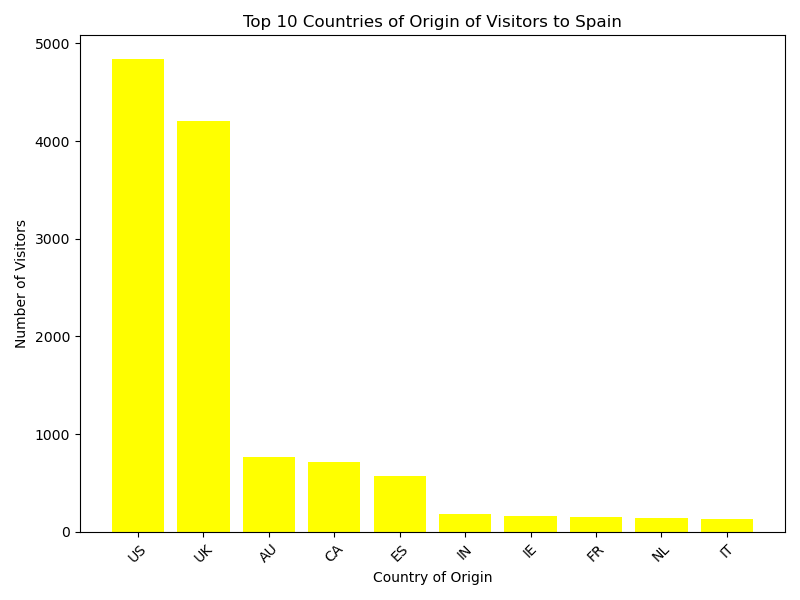

In [34]:
top_10_countries = visitors_to_Spain.head(10)

plt.figure(figsize=(8, 6))
plt.bar(top_10_countries['Country'], top_10_countries['Number_of_Visitors'], color='yellow')

plt.xlabel('Country of Origin')
plt.ylabel('Number of Visitors')
plt.title('Top 10 Countries of Origin of Visitors to Spain')

plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

### Where do visitors to United Kingdom come from?

In [35]:
# Filter reviews related to UK
UK_reviews = data[data['ISO'] == 'UK']

In [36]:
# Group by 'userLocation' and count the number of reviews for each country
visitors_to_UK = UK_reviews['User ISO'].value_counts().reset_index()

In [37]:
# Rename the columns for clarity
visitors_to_UK.columns = ['Country', 'Number_of_Visitors']

In [38]:
# Display the result
visitors_to_UK.head(20)  # Displaying the top countries, you can remove .head() to see all countries

,Country,Number_of_Visitors
0,UK,8754
1,US,3463
2,AU,739
3,CA,521
4,IE,194
5,IN,130
6,NZ,117
7,NL,83
8,ES,82
9,ZA,74


E:\user\anaconda3\Lib\site-packages\ipywidgets\widgets\widget.py:528: DeprecationWarning: The `ipykernel.comm.Comm` class has been deprecated. Please use the `comm` module instead.For creating comms, use the function `from comm import create_comm`.
  self.comm = Comm(**args)
E:\user\anaconda3\Lib\site-packages\ipywidgets\widgets\widget.py:528: DeprecationWarning: The `ipykernel.comm.Comm` class has been deprecated. Please use the `comm` module instead.For creating comms, use the function `from comm import create_comm`.
  self.comm = Comm(**args)
E:\user\anaconda3\Lib\site-packages\ipywidgets\widgets\widget.py:502: DeprecationWarning: Passing unrecognized arguments to super(Toolbar).__init__().
NavigationToolbar2WebAgg.__init__() missing 1 required positional argument: 'canvas'
This is deprecated in traitlets 4.2.This error will be raised in a future release of traitlets.
  super().__init__(**kwargs)
E:\user\anaconda3\Lib\site-packages\ipywidgets\widgets\widget.py:528: DeprecationWarnin

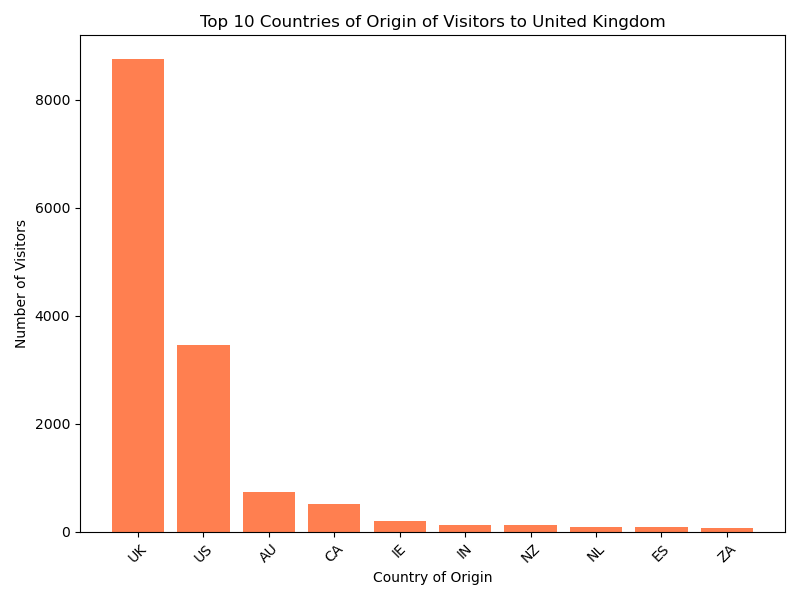

In [39]:
top_10_countries = visitors_to_UK.head(10)

plt.figure(figsize=(8, 6))
plt.bar(top_10_countries['Country'], top_10_countries['Number_of_Visitors'], color='coral')

plt.xlabel('Country of Origin')
plt.ylabel('Number of Visitors')
plt.title('Top 10 Countries of Origin of Visitors to United Kingdom')

plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

##### HERE WE WILL SEE HOW MANY VISITORS CAME TO PORTUGAL AND SPAIN BEFORE AND AFTER THE PANDEMIC.
##### ACCORDINGLY, WE CAN SEE WHAT HAPPENED AFTER THE PANDEMIC.

In [121]:
# Filter reviews related to Portugal
portugal_reviews = data[data['ISO'] == 'PT']

In [122]:
# Include day, month, year, and time in 'YearMonth'
portugal_reviews['YearMonth'] = portugal_reviews['Review Visited'].dt.strftime('%Y-%m-%d %H:%M:%S')
# Count visitors by country

C:\Users\gunka\AppData\Local\Temp\ipykernel_21932\3566813822.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  portugal_reviews['YearMonth'] = portugal_reviews['Review Visited'].dt.strftime('%Y-%m-%d %H:%M:%S')


In [123]:
# Count visitors by country
visitors_by_country = portugal_reviews['User ISO'].value_counts().reset_index()
visitors_by_country.columns = ['Country', 'Number_of_Visitors']

In [125]:
# Display the countries with the most visitors to Portugal
print("Countries with the most visitors to Portugal:")
visitors_by_country.head(10)

Countries with the most visitors to Portugal:


,Country,Number_of_Visitors
0,US,1015
1,UK,880
2,CA,278
3,PT,180
4,AU,157
5,IE,86
6,NL,71
7,ES,52
8,DE,51
9,IT,50


In [126]:
# Count visitors before and after the pandemic
before_pandemic = portugal_reviews[portugal_reviews['Review Visited'] < '2020-03']['User ISO'].value_counts().reset_index()
before_pandemic.columns = ['Country', 'Number_of_Visitors_Before_Pandemic']

In [127]:
after_pandemic = portugal_reviews[portugal_reviews['Review Visited'] >= '2020-03']['User ISO'].value_counts().reset_index()
after_pandemic.columns = ['Country', 'Number_of_Visitors_After_Pandemic']

In [128]:
# Merge before and after pandemic data
comparison_data = pd.merge(before_pandemic, after_pandemic, on='Country', how='outer').fillna(0)

In [129]:
# Display the comparison data
print("\nComparison of visitors before and after the pandemic:")
comparison_data.head(25)


Comparison of visitors before and after the pandemic:


,Country,Number_of_Visitors_Before_Pandemic,Number_of_Visitors_After_Pandemic
0,US,969.0,46.0
1,UK,813.0,67.0
2,CA,268.0,10.0
3,PT,158.0,22.0
4,AU,157.0,0.0
5,IE,83.0,3.0
6,NL,66.0,5.0
7,DE,48.0,3.0
8,ES,47.0,5.0
9,IT,43.0,7.0


Based on the numbers presented, we can make the following observations:

About Portugal:
* The main countries of origin for visitors to Portugal are the United States and the United Kingdom, followed by Canada and Australia. This suggests that marketing efforts can be directed to these countries to attract more tourists.
* Local (Portuguese) visitors also contribute a significant share, which may indicate the importance of domestic tourism.

About Spain:

* The United States and the United Kingdom are also the main countries of origin for visitors to Spain, but with much higher numbers compared to Portugal. This suggests that Spain is a very popular destination for these countries.
* The presence of other European countries, such as France, Italy and Germany, indicates that Spain is an attractive destination for European travelers.India is also among the top 10 countries of origin, which could be interesting for marketing strategies aimed at this growing market.

About the United Kingdom:

* The United States, Australia and Canada are the main countries of origin for visitors to the United Kingdom, suggesting that the United Kingdom is a popular destination for English speaker
* The presence of European countries indicates that the United Kingdom also attracts European travelers.rs.rs.ket.

For Portugal compared to Spain and the United Kingdom:
1) Although Spain and the United Kingdom are direct competitors in attracting English-speaking visitors, Portugal still attracts a significant number of visitors from the United States, Canada and Australia. This suggests that Portugal has an advantage in attracting tourists from other English-speaking regions.
2) Portugal also attracts visitors from other European countries such as France, Germany and Italy, which may not be the main target markets for Spain and the UK. Therefore, Portugal can stand out as an alternative destination for these European tourists.
3) It is important to analyze the interests and preferences of visitors from each country to create specific marketing strategies. For example, visitors from the United States, Canada and Australia may be more interested in unique cultural experiences, while Europeans may be looking for sun and sand.
4) Portugal can differentiate itself by highlighting its unique attractions such as wineries, rich history and stunning landscapes to attract visitors seeking authentic experiences.
5) Offering special promotions, travel packages and exclusive activities can be an effective way to attract visitors from the U.S., Canada and Australia, especially those looking for a unique experience.
6) By analyzing travel trends and consumer behavior in each target market, you can adapt your marketing strategies and deliver what tourists are looking for.
7) The visibility of Portugal as a tourist destination can be increased through strategic cooperation with airlines, travel agencies and tour operators.

In conclusion, Portugal can position itself as an attractive destination for both English-speaking visitors and European tourists by highlighting its unique characteristics and adapting its marketing strategies to meet the different needs and preferences of visitors in each market. It is important to create a targeted marketing strategy and differentiate yourself from the competition to increase the number of visitors to Portugal.

### Pre-pandemic and post-pandemic Portugal.

In [40]:
# Filter reviews related to Portugal
Portugal_reviews = data[data['ISO'] == 'PT']

In [42]:
# Include day, month, year, and time in 'YearMonth'
Portugal_reviews.loc[:, 'YearMonth'] = Portugal_reviews['Review Visited'].dt.strftime('%Y-%m-%d %H:%M:%S')
# Count visitors by country

In [43]:
# Count visitors by country
visitors_by_country = Portugal_reviews['User ISO'].value_counts().reset_index()
visitors_by_country.columns = ['Country', 'Number_of_Visitors']

In [44]:
# Display the countries with the most visitors to Portugal
print("Countries with the most visitors to Portugal:")
visitors_by_country.head(10)

Countries with the most visitors to Portugal:


,Country,Number_of_Visitors
0,US,1015
1,UK,880
2,CA,278
3,PT,180
4,AU,157
5,IE,86
6,NL,71
7,ES,52
8,DE,51
9,IT,50


In [45]:
# Count visitors before and after the pandemic
before_pandemic = Portugal_reviews[Portugal_reviews['Review Visited'] < '2020-03']['User ISO'].value_counts().reset_index()
before_pandemic.columns = ['Country', 'Number_of_Visitors_Before_Pandemic']

In [46]:
after_pandemic = Portugal_reviews[Portugal_reviews['Review Visited'] >= '2020-03']['User ISO'].value_counts().reset_index()
after_pandemic.columns = ['Country', 'Number_of_Visitors_After_Pandemic']

In [47]:
# Merge before and after pandemic data
comparison_data = pd.merge(before_pandemic, after_pandemic, on='Country', how='outer').fillna(0)

In [48]:
# Display the comparison data
print("\nComparison of visitors before and after the pandemic:")
comparison_data.head(20)


Comparison of visitors before and after the pandemic:


,Country,Number_of_Visitors_Before_Pandemic,Number_of_Visitors_After_Pandemic
0,US,969.0,46.0
1,UK,813.0,67.0
2,CA,268.0,10.0
3,PT,158.0,22.0
4,AU,157.0,0.0
5,IE,83.0,3.0
6,NL,66.0,5.0
7,DE,48.0,3.0
8,ES,47.0,5.0
9,IT,43.0,7.0


E:\user\anaconda3\Lib\site-packages\ipywidgets\widgets\widget.py:528: DeprecationWarning: The `ipykernel.comm.Comm` class has been deprecated. Please use the `comm` module instead.For creating comms, use the function `from comm import create_comm`.
  self.comm = Comm(**args)
E:\user\anaconda3\Lib\site-packages\ipywidgets\widgets\widget.py:528: DeprecationWarning: The `ipykernel.comm.Comm` class has been deprecated. Please use the `comm` module instead.For creating comms, use the function `from comm import create_comm`.
  self.comm = Comm(**args)
E:\user\anaconda3\Lib\site-packages\ipywidgets\widgets\widget.py:502: DeprecationWarning: Passing unrecognized arguments to super(Toolbar).__init__().
NavigationToolbar2WebAgg.__init__() missing 1 required positional argument: 'canvas'
This is deprecated in traitlets 4.2.This error will be raised in a future release of traitlets.
  super().__init__(**kwargs)
E:\user\anaconda3\Lib\site-packages\ipywidgets\widgets\widget.py:528: DeprecationWarnin

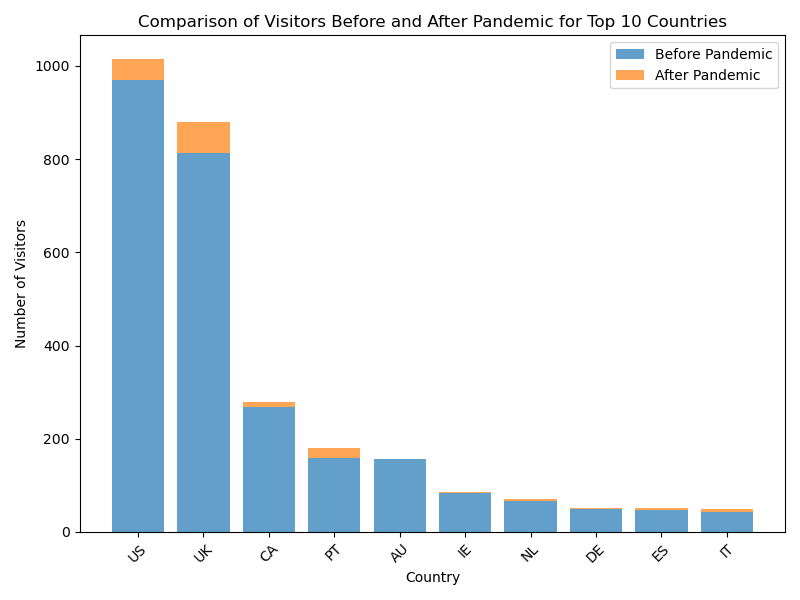

In [50]:
# Select the first 10 countries
top_10_countries = comparison_data.head(10)

# Configure chart size
plt.figure(figsize=(8, 6))

# Create a stacked bar chart
plt.bar(top_10_countries['Country'], top_10_countries['Number_of_Visitors_Before_Pandemic'], label='Before Pandemic', alpha=0.7)
plt.bar(top_10_countries['Country'], top_10_countries['Number_of_Visitors_After_Pandemic'], label='After Pandemic', alpha=0.7, bottom=top_10_countries['Number_of_Visitors_Before_Pandemic'])

# Add labels and title
plt.xlabel('Country')
plt.ylabel('Number of Visitors')
plt.title('Comparison of Visitors Before and After Pandemic for Top 10 Countries')
plt.xticks(rotation=45)
plt.legend()

# View the chart
plt.tight_layout()
plt.show()

To improve these figures and attract more visitors to Portugal, it is important to consider marketing and promotion strategies for the country as a tourist destination. Here are some suggestions:
1) Invest in digital marketing campaigns targeting countries with the potential to attract more tourists to Portugal, such as the United States (US), United Kingdom (UK), Canada (CA) and other countries with significant pre-pandemic visitor numbers. This may include online advertising, content marketing, social media and search engine optimization (SEO).
2) Run special promotions to attract visitors from countries with lower visitor numbers, such as Australia (AU), New Zealand (NZ), Greece (GR) and others. Offer discounts, special packages and unique experiences to encourage travel to Portugal.
3) Establish partnerships with airlines, travel agents and tour operators to promote tourist packages to Portugal. Offering amenities such as direct flights and affordable accommodation can attract more visitors.
4) Organize events, festivals and cultural activities that attract international attention. This can include music festivals, sporting events, food fairs and cultural exhibitions.
5) Promote the cultural and historical aspects of Portugal in marketing campaigns. Promoting historical sites, museums, architecture and local traditions can attract travelers interested in culture.
6) Invest in improving tourist infrastructure such as airports, public transport and accommodation. A well-developed infrastructure can make visiting Portugal more convenient and attractive.
7) Highlight the health and safety protocols in place to ensure tourists feel safe during their visit. Transparency about security measures can increase traveler confidence.
8) Continue to diversify Portugal's tourist attractions to attract different types of travelers, including those interested in nature, sports, gastronomy, wine, history and more.
9) Collect feedback from visitors to understand their needs and preferences. This can help adjust marketing strategies and improve the tourist experience.
10) Develop promotional strategies and facilitate the travel process by working closely with tourism and government agencies.

Remember that the resumption of tourism after the pandemic may be gradual, but with continuous efforts and well-planned strategies, Portugal can increase the number of visitors over time.

In [51]:
import datetime
print(datetime.datetime.now())

2024-01-06 17:58:30.581901
